<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
# !wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

import requests
import os

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'
response = requests.get(url)

# Save the file to the specified directory
file_path = r'F:\COURSERA\DATA ANALYST\IBM.CAPSTONE.PROJECT\LAB8-DataVisualization-Lab\m4_survey_data.sqlite'
with open(file_path, 'wb') as file:
    file.write(response.content)

print("File exists:", os.path.exists(file_path))
print("File size:", os.path.getsize(file_path))


File exists: True
File size: 36679680


Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()


,COUNT(*)
0,11398


## Demo: How to list all tables


In [33]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


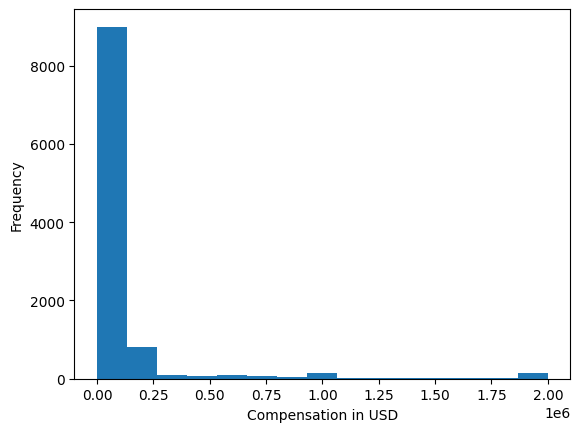

In [8]:
# import matplotlib.ticker as ticker

query1 = ''' SELECT ConvertedComp from master'''
sql1 = pd.read_sql_query(query1,conn)
plt.hist(sql1['ConvertedComp'],bins=15)
plt.xlabel("Compensation in USD")
plt.ylabel("Frequency")

# plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

### Box Plots


Plot a box plot of `Age.`


Text(0.5, 1.0, 'Box Plot ranging by Age')

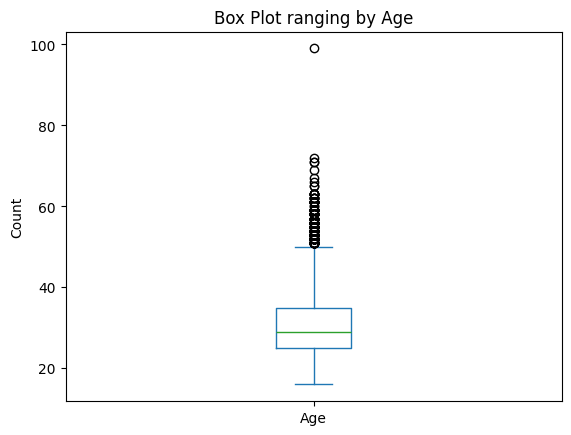

In [9]:
query2 = '''SELECT Age from master'''
sql2 = pd.read_sql_query(query2,conn)
ax = sql2.plot(kind="box")
# ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.set_title("Box Plot ranging by Age")

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


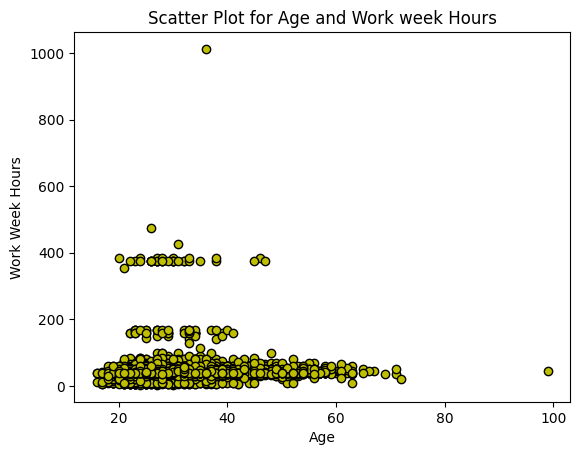

In [10]:
query3 = '''Select Age,WorkWeekHrs from master'''
sql3 = pd.read_sql_query(query3,conn)
plt.scatter(sql3['Age'],sql3['WorkWeekHrs'],color='y',edgecolors='black')
plt.xlabel("Age")
plt.ylabel("Work Week Hours")
plt.title("Scatter Plot for Age and Work week Hours")
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.

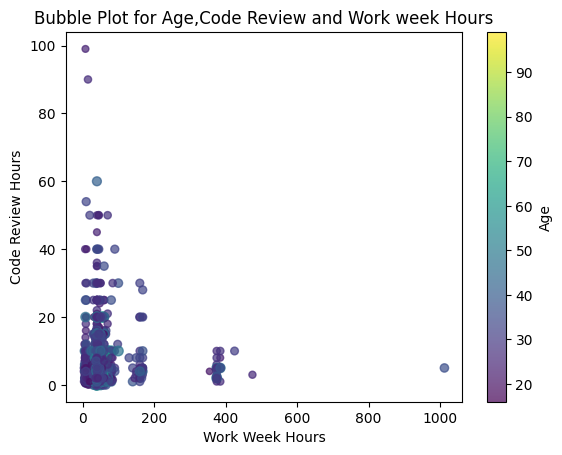

In [11]:
query4 = '''Select WorkWeekHrs,CodeRevHrs,Age from master'''
sql4 = pd.read_sql_query(query4,conn)
colors = sql4["Age"]
plt.scatter(sql4["WorkWeekHrs"],sql4["CodeRevHrs"],s=sql4["Age"],c=colors,alpha=0.7,cmap="viridis")
plt.colorbar(label="Age")
plt.xlabel("Work Week Hours")
plt.ylabel("Code Review Hours")
plt.title("Bubble Plot for Age,Code Review and Work week Hours")
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


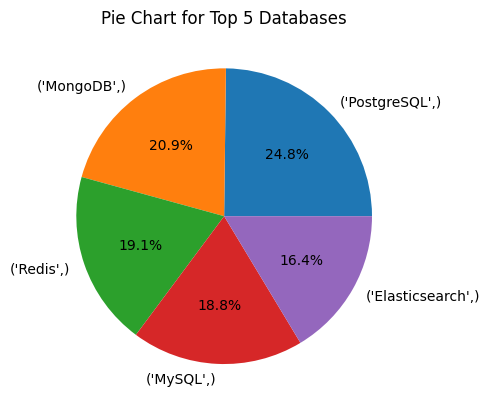

In [49]:
query5 = '''SELECT DatabaseDesireNextYear from DatabaseDesireNextYear'''
sql5 = pd.read_sql_query(query5,conn)
top5db = sql5.value_counts().head()


plt.pie(top5db,labels=top5db.index,autopct='%1.1f%%')
plt.title("Pie Chart for Top 5 Databases")
plt.show()

# lan = '''SELECT LanguageDesireNextYear,count(*) as cnt from LanguageDesireNextYear group by LanguageDesireNextYear 
# order by cnt desc 
# '''
# s = pd.read_sql_query(lan,conn)
# s

# lan = '''SELECT count(LanguageWorkedWith) from LanguageWorkedWith where LanguageWorkedWith='SQL' '''
# s = pd.read_sql_query(lan,conn)
# s


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


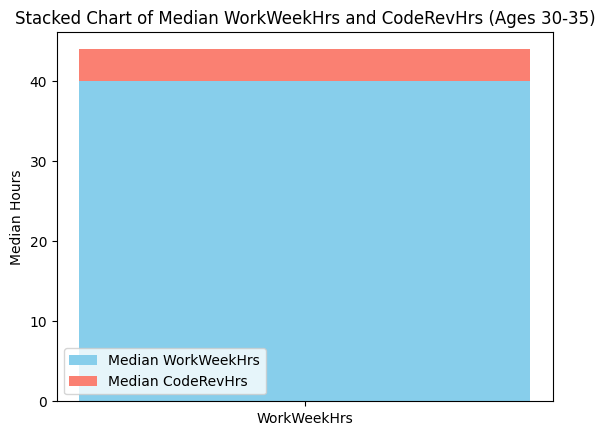

In [13]:
query6 = '''
SELECT 
    count(*),  
    CASE
        WHEN (count(*)%2) = 0 THEN 'Even'
        ELSE 'Odd'
    END AS ColCount
from master where WorkWeekHrs IS NOT NULL AND CodeRevHrs IS NOT NULL AND Age BETWEEN 30 AND 35'''
sql6 = pd.read_sql_query(query6,conn)
sql6

workMed = '''SELECT AVG(WorkWeekHrs)
FROM (
  SELECT WorkWeekHrs
  FROM master
  WHERE WorkWeekHrs IS NOT NULL AND CodeRevHrs IS NOT NULL AND Age BETWEEN 30 AND 35
  ORDER BY WorkWeekHrs
  LIMIT 2 OFFSET (
    SELECT (COUNT(*) / 2) - 1
    FROM master
    WHERE WorkWeekHrs IS NOT NULL AND CodeRevHrs IS NOT NULL AND Age BETWEEN 30 AND 35
  )
);
'''
workMedsql = pd.read_sql_query(workMed,conn)

codeMed = '''SELECT AVG(CodeRevHrs)
FROM (
  SELECT CodeRevHrs
  FROM master
  WHERE WorkWeekHrs IS NOT NULL AND CodeRevHrs IS NOT NULL AND Age BETWEEN 30 AND 35
  ORDER BY CodeRevHrs
  LIMIT 2 OFFSET (
    SELECT (COUNT(*) / 2) - 1
    FROM master
    WHERE WorkWeekHrs IS NOT NULL AND CodeRevHrs IS NOT NULL AND Age BETWEEN 30 AND 35
  )
);
'''
codeMedsql = pd.read_sql_query(codeMed,conn)

# print("Median WorkWeekHrs:", workMedsql)
# print("Median CodeRevHrs:", codeMedsql)

median_workweekhrs = workMedsql.iloc[0, 0]  # Extract the median WorkWeekHrs
median_coderevhrs = codeMedsql.iloc[0, 0]    # Extract the median CodeRevHrs

plt.bar('WorkWeekHrs', median_workweekhrs, color='skyblue', label='Median WorkWeekHrs')
plt.bar('WorkWeekHrs', median_coderevhrs, bottom=median_workweekhrs, color='salmon', label='Median CodeRevHrs')
plt.title('Stacked Chart of Median WorkWeekHrs and CodeRevHrs (Ages 30-35)')
# plt.xlabel('Hour Type')
plt.ylabel('Median Hours')
plt.legend()

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


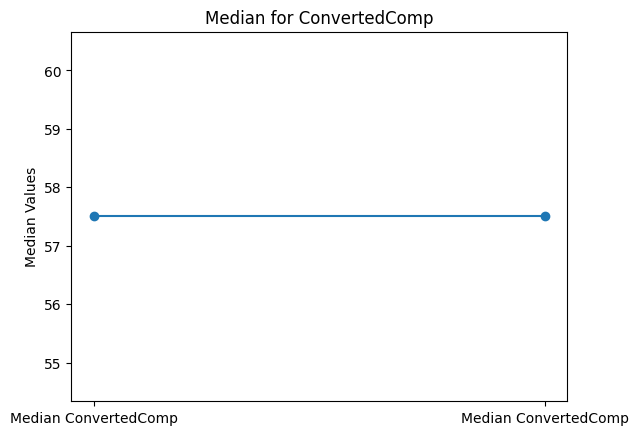

In [14]:
query7 = '''SELECT count(*) from master where ConvertedComp between 45 AND 60'''
sql7 = pd.read_sql_query(query7,conn)

medConv = '''Select avg(ConvertedComp) as medCon from (select ConvertedComp from master where ConvertedComp 
is not null AND ConvertedComp between 45 AND 60 order by ConvertedComp limit 2 offset 1)'''
Convsql = pd.read_sql_query(medConv,conn)

extraction = Convsql.iloc[0,0]
plt.plot([1,4],[extraction,extraction],marker='o')
plt.xticks([1,4],['Median ConvertedComp','Median ConvertedComp'])
plt.ylabel("Median Values")
plt.title("Median for ConvertedComp")
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


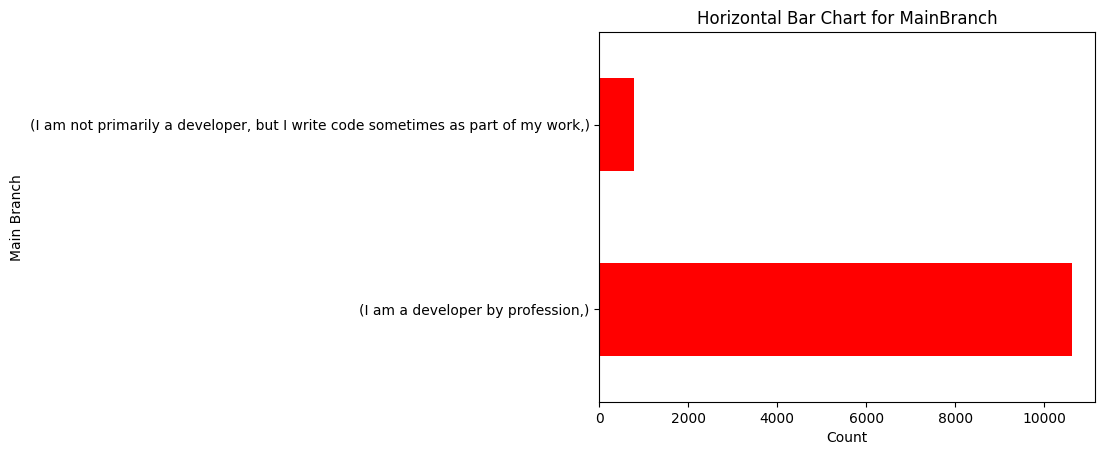

In [15]:
query8 = '''select MainBranch from master'''
sql8 = pd.read_sql_query(query8,conn)
# barPlot=sql8.iloc[0,0]
branchCnt = sql8.value_counts()
branchCnt.plot(kind='barh',color='r')
plt.title('Horizontal Bar Chart for MainBranch')
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.show()

Close the database connection.


In [130]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
